<a href="https://colab.research.google.com/github/Skvorok/netology_pyda/blob/master/Hw_15_statistica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics


Загрузить датасет по url:


In [0]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df = pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Задание 1. Посмотреть первые несколько рядов таблицы

In [0]:
df.head() 

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Задание 2. Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

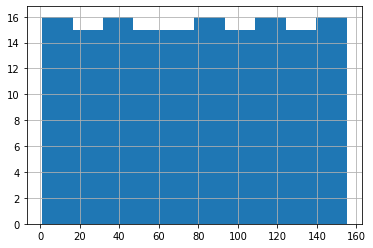

In [5]:
df.Freedom.hist()

Распределение - равномерное.

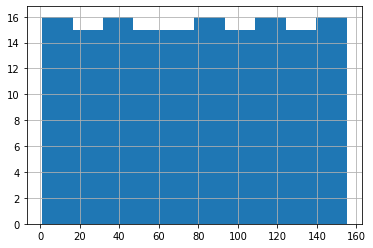

In [6]:
df["Positive affect"].hist()

Данный параметр представляет собой равномерное распрделение.

Задание 3. Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
df = df.dropna()
print(f'медиана {statistics.median(df.Freedom)}')
print(f'мат.ожидание {statistics.mean(df.Freedom)}')

print(f'минимум {df.Freedom.min()}')
print(f'максимум {df.Freedom.max()}')
print(f'размах {df.Freedom.max()-df.Freedom.min()}')
print(f'стандартное отклонение {statistics.pstdev(df.Freedom)}')
print(f'дисперсия {statistics.pvariance(df.Freedom)}')
print(f'количество отсутствующих значений {df.Freedom.isnull().sum()}')

print(f'мода {statistics.mode(df.Freedom)}')


медиана 79.5
мат.ожидание 78.82857142857142
минимум 1.0
максимум 155.0
размах 154.0
стандартное отклонение 44.9475794449399
дисперсия 2020.2848979591836
количество отсутствующих значений 0


StatisticsError: ignored

Задание 4. Почему нельзя найти моду?

Ответ: так как нет наиболее частого значения, есть множество значений с одинаковой частотой, т.е. распредление параметра 'freedom' равномерное.

Задание 5. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

коэффициент Пирсона (0.6965670458090685, 1.2239087557813634e-21)


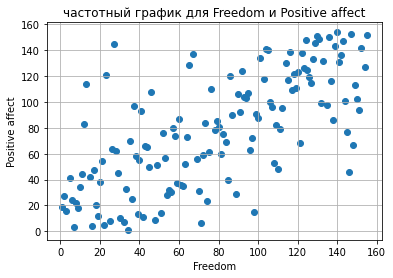

In [10]:
# математически:
pearson = sts.pearsonr(df['Freedom'].dropna(), df['Positive affect'].dropna())
print(f'коэффициент Пирсона {pearson}')

# графически:
plt.scatter(df['Freedom'], df['Positive affect'])
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('частотный график для Freedom и Positive affect')
plt.show()

Ответ на вопрос: знак коэффициента Пирсона говорит о степени корреляции величин между собой. При положительном коэффициенте у величин прямая связь, при отрицательном - обратная. 

Задание 6. Нормализовать данные колонки Freedom (централизация + масштабирование)

In [18]:
# нормализация вручную:
df['Freedom_norm'] = (df.Freedom-df.Freedom.mean())
x = df.Freedom_norm.min()
df.Freedom_norm = df.Freedom_norm/x
print(df.Freedom_norm.max())
print(df.Freedom_norm.min())
print('\n')

# нормализация с помощью библиотек:
from sklearn import preprocessing
freedom_norm2 = preprocessing.MinMaxScaler(feature_range = (-1,1)).fit_transform(np.array(df.Freedom).reshape(-1, 1))
print(freedom_norm2.min())
print(freedom_norm2.max())

1.0
-0.9787077826725405


-0.9999999999999999
1.0000000000000002


Задание 7. Построить матрицу корреляций для всех колонок таблицы.

                            Ladder  ...  Freedom_norm
Ladder                    1.000000  ...     -0.546414
SD of Ladder              0.555987  ...     -0.250246
Positive affect           0.511870  ...     -0.696567
Negative affect           0.539677  ...     -0.415935
Social support            0.833412  ...     -0.478613
Freedom                   0.546414  ...     -1.000000
Corruption                0.224394  ...     -0.407571
Generosity                0.485704  ...     -0.498226
Log of GDP\nper capita    0.820608  ...     -0.385919
Healthy life\nexpectancy  0.826677  ...     -0.423949
Freedom_norm             -0.546414  ...      1.000000

[11 rows x 11 columns]


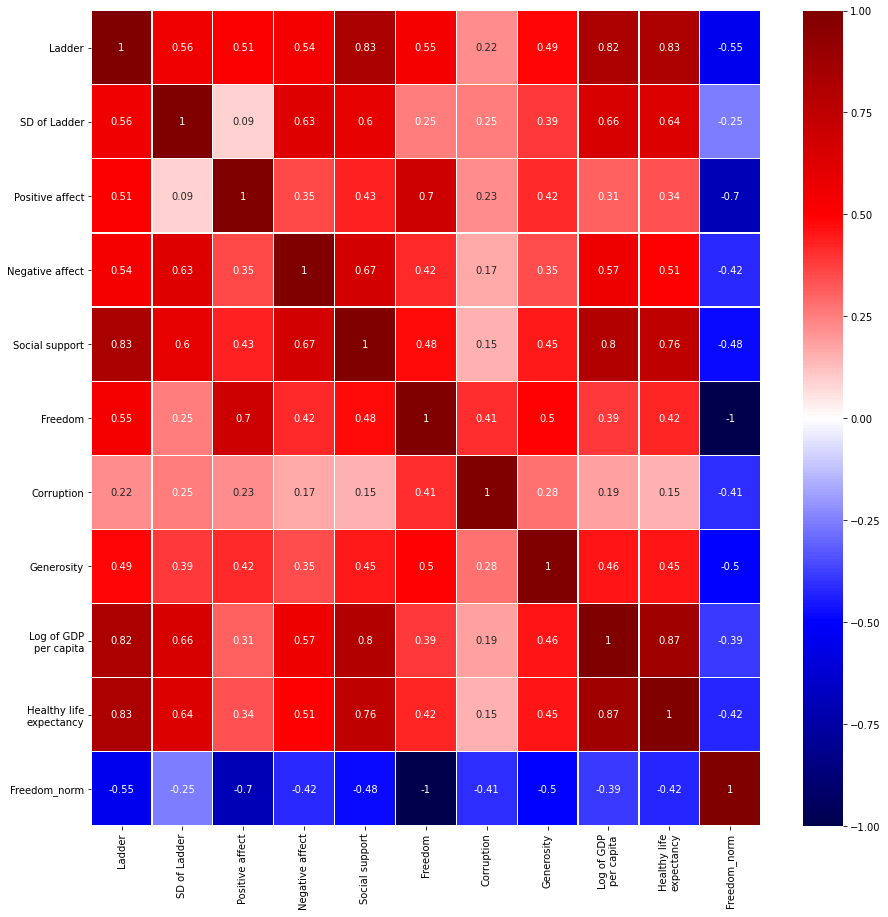

In [20]:
import seaborn as sns
print(df.corr())

sns.heatmap(df.corr(),annot = True,cmap = 'seismic',linewidths=0.2)
plt.gcf().set_size_inches(15,15)

Задание 8. Загрузить таблицу цен на авокадо: 

In [26]:
import platform
if platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/drive')
  trajectory = '/content/drive/My Drive/Colab Notebooks/'
else:
  trajectory = ''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:

df = pd.read_csv(trajectory+'avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Задание 9. Сделать частотный график колонки AveragePrice. Какое это распределение?

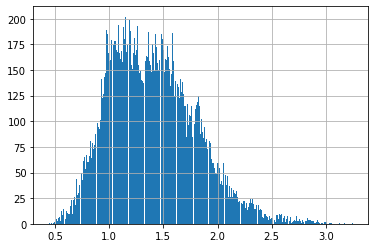

In [32]:
df['AveragePrice'].hist(bins = 300)

Ответ на вопрос: распределение похоже на логнормальное.


Задание 10. Найти корреляцию в следующих колонках:колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?




In [0]:
df[['4046','4225','4770', 'AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


Между колонками 4046, 4225 и 4770 есть прямая корреляция, так как коэффициент положителен и приближен к 1. Это значит, что, скорее всего, эти величины взаимозависимы.